<a href="https://colab.research.google.com/github/33Martin22/TIME-SERIES-DATA-ANALYSIS/blob/main/time_series_focus_temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/33Martin22/TIME-SERIES-DATA-ANALYSIS.git

Cloning into 'TIME-SERIES-DATA-ANALYSIS'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 11.86 MiB | 29.92 MiB/s, done.


**Time Series** - **Forecast on global temperatures Business Problem: Anticipation and Mitigation of Economic and Environmental Impacts Caused by Global Warming**

**Objective**: Use historical global temperature data to build a long-term temperature trend forecasting model, analyzing the impact on specific sectors such as agriculture, tourism, and infrastructure. The aim is to provide insights that can guide mitigation and adaptation strategies, helping governments and companies prepare for the future impacts of climate change in different regions and industries.

**Components for Analysis**

**1.Time Trend Analysis:** Analyze trends in average, minimum, and maximum temperatures over the years by region (country, state, city). Assess seasonal variations and anomalies that may suggest accelerated climate change in certain areas.

**2.Temperature Forecasting with Time Series Models:** Develop a temperature forecasting model for the next 10, 20, and 50 years, highlighting regions with the highest warming trends. Methods like ARIMA, Prophet, or LSTM neural networks could be used to predict future changes in global and regional temperatures.

**3.Risk and Opportunity Mapping: Based on temperature forecasts,** identify vulnerable regions to environmental impacts (e.g., sea level rise in coastal areas) and economic sectors that are most exposed (such as agriculture, which depends on climate).

**4.Cost Estimation and Infrastructure Planning:** Assess expected economic impacts, such as increased energy costs due to cooling demand and potential agricultural losses.

In [ ]:
# Installing packages
!pip install watermark
!pip install pmdarima
!pip install folium
!pip install geopandas
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 60.8 MB/s eta 0:00:00


In [ ]:
# Import of libraries

# System libraries
import re
import string
import unicodedata
import itertools
from collections import Counter

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Time Series
import pmdarima as pm
from prophet import Prophet
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.10.12
Author: Library versions

watermark  : 2.5.0
re         : 2.2.1
statsmodels: 0.14.4
platform   : 1.0.8
prophet    : 1.1.6
matplotlib : 3.8.0
numpy      : 1.26.4
sklearn    : 1.5.2
pandas     : 2.2.2
seaborn    : 0.13.2
pmdarima   : 2.0.4
plotly     : 5.24.1



Reading all the Datasets

In [ ]:
data_1=pd.read_csv("/GlobalLandTemperaturesByCity.csv")
data_1.head()



,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [ ]:
data_3=pd.read_csv("/GlobalLandTemperaturesByMajorCity.csv")
data_3.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [ ]:
data_4=pd.read_csv("/GlobalLandTemperaturesByState.csv")
data_4.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [ ]:
data_5=pd.read_csv("/GlobalTemperatures.csv")
data_5.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_country=pd.read_csv("/GlobalLandTemperaturesByCountry.csv")
df_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [ ]:
data_1.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [ ]:
data_1.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
189130,1877-05-01,15.854,0.691,Alexandria,United States,39.38N,76.99W
189131,1877-06-01,22.776,1.730,Alexandria,United States,39.38N,76.99W
189132,1877-07-01,25.087,0.534,Alexandria,United States,39.38N,76.99W
189133,1877-08-01,23.962,0.566,Alexandria,United States,39.38N,76.99W
189134,1877-09-01,19.092,0.453,A,NaN,NaN,NaN


In [ ]:
data_1.shape

(189135, 7)

In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189135 entries, 0 to 189134
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             189135 non-null  object 
 1   AverageTemperature             181730 non-null  float64
 2   AverageTemperatureUncertainty  181730 non-null  float64
 3   City                           189135 non-null  object 
 4   Country                        189134 non-null  object 
 5   Latitude                       189134 non-null  object 
 6   Longitude                      189134 non-null  object 
dtypes: float64(2), object(5)
memory usage: 10.1+ MB


In [ ]:
data_1.dtypes

,0
dt,object
AverageTemperature,float64
AverageTemperatureUncertainty,float64
City,object
Country,object
Latitude,object
Longitude,object


In [ ]:
# Convert the 'dt' column to datetime format
data_1['dt'] = pd.to_datetime(data_1['dt'])

In [ ]:
data_1 = pd.read_csv("/GlobalLandTemperaturesByCity.csv")
data_3 = pd.read_csv("/GlobalLandTemperaturesByMajorCity.csv")
data_4 = pd.read_csv("/GlobalLandTemperaturesByState.csv")
data_5 = pd.read_csv("/GlobalTemperatures.csv")
df_country = pd.read_csv("/GlobalLandTemperaturesByCountry.csv")

Data Cleaning

In [ ]:
# Check for missing values in each column data 1
missing_values = data_1.isnull().sum()
print("Missing values per column in the dataset - data_1:\n", missing_values)
print()
# Check for missing values in each column data 2
missing_values = df_country.isnull().sum()
print("Missing values per column in the dataset - data 2:\n", missing_values)
print()
# Check for missing values in each column data 3
missing_values = data_3.isnull().sum()
print("Missing values per column in the dataset - data 3:\n", missing_values)
print()
# Check for missing values in each column data 4
data_4 = data_4.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])
missing_values = data_4.isnull().sum()
print("Missing values per column in the dataset - data 4:\n", missing_values)
print()
# Check for missing values in each column data 5
# Check for missing values in each column
missing_values = data_5.isnull().sum()
print("Missing values per column in the dataset - data 5:\n", missing_values)

Missing values per column in the dataset - data_1:
 dt                                   0
AverageTemperature               38173
AverageTemperatureUncertainty    38173
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

Missing values per column in the dataset - data 2:
 dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

Missing values per column in the dataset - data 3:
 dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

Missing values per column in the dataset - data 4:
 dt                               0
AverageTemper

In [ ]:
# Remove rows with missing values in the main temperature columns for data 1
data_1 = data_1.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])
missing_values = data_1.isnull().sum()
print("Missing values per column in the dataset - data_1:\n", missing_values)
print()

# Remove rows with missing values in the main temperature columns for data 2
df_country = df_country.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])
missing_values = df_country.isnull().sum()
print("Missing values per column in the dataset - data_2:\n", missing_values)
print()

# Remove rows with missing values in the main temperature columns for data 3
data_3 = data_3.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])
missing_values = data_3.isnull().sum()
print("Missing values per column in the dataset - data_3:\n", missing_values)
print()

# Remove rows with missing values in the main temperature columns for data 4
data_4 = data_4.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])
missing_values = data_4.isnull().sum()
print("Missing values per column in the dataset - data_4:\n", missing_values)
print()

# Remove rows with missing values in the main temperature columns for data 5
data_5 = data_5.dropna(subset=['LandAverageTemperature', 'LandAverageTemperatureUncertainty', 'LandMaxTemperature',
                              'LandMaxTemperatureUncertainty', 'LandMinTemperature', 'LandMinTemperatureUncertainty',
                              'LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty'])
missing_values = data_5.isnull().sum()
print("Missing values per column in the dataset - data_5:\n", missing_values)

Missing values per column in the dataset - data_1:
 dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

Missing values per column in the dataset - data_2:
 dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

Missing values per column in the dataset - data_3:
 dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

Missing values per column in the dataset - data_4:
 dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
State          

**Exploratory Data Aanalysis**

**1.What are the global average temperature trends over the past centuries?**

**Answer with Python:** Using libraries like pandas and matplotlib, you can calculate and visualize global average temperature trends over time. Using a time series, you can apply smoothing (rolling mean) or decomposition to identify seasonal and long-term trends.

**2.Is there a correlation between rising temperatures and specific regions (e.g., countries or cities)?**

**Answer with Python:** Group the data by country, state, or city and calculate the annual average temperature for each region. Use matplotlib or seaborn to create scatter plots or heatmaps to visualize the temperature correlation across different regions.

**3.Which regions show the highest temperature increase in recent decades?**

**Answer with Python:** Filter the dataset for recent decades and calculate the temperature change rate for each region. Sort the regions by the rate of increase and visualize the hottest regions with bar charts or maps.

**4.How can we forecast global and regional temperatures for the coming years?**

**Answer with Python:** Split the data into training and test periods, and use time series models like ARIMA, Prophet, or LSTM neural networks to forecast temperature. These models can be trained using libraries such as statsmodels, fbprophet, or tensorflow.

**5.What is the relationship between temperature and uncertainty variables over time?**

**Answer with Python:** Use the Uncertainty column along with temperatures. You can use line and bar charts to compare uncertainty variation over the years and investigate if there is any relationship with measurement changes.

**6.Have maximum and minimum temperatures consistently increased over time?**

**Answer with Python**: Filter the data for LandMaxTemperature and LandMinTemperature and calculate the annual average for each variable. Create line charts to compare the evolution of maximum and minimum temperatures over time.

**7.Which periods and regions have the highest uncertainties in temperature measurements? ** **bold text**

**Answer with Python** : Use the AverageTemperatureUncertainty column and analyze the average uncertainty by year and region. Bar or scatter plots can show periods and regions with the highest uncertainties in temperature measurements.

**8.What is the temperature difference between the land average and the land-ocean average?**

**Answer with Python:** Using the LandAverageTemperature and LandAndOceanAverageTemperature columns, you can calculate the difference between the two averages over time. Visualize this difference with a line chart to observe how isting you want to perform.




**Question 1 :What are the global average temperature trends over the past centuries?**

In [ ]:
# Database
data_home2 = pd.read_csv("/GlobalTemperatures.csv")

# Convert the 'dt' column to datetime format
data_home2['dt'] = pd.to_datetime(data_home2['dt'])

# Extract the year from the 'dt' column
data_home2['Year'] = data_home2['dt'].dt.year

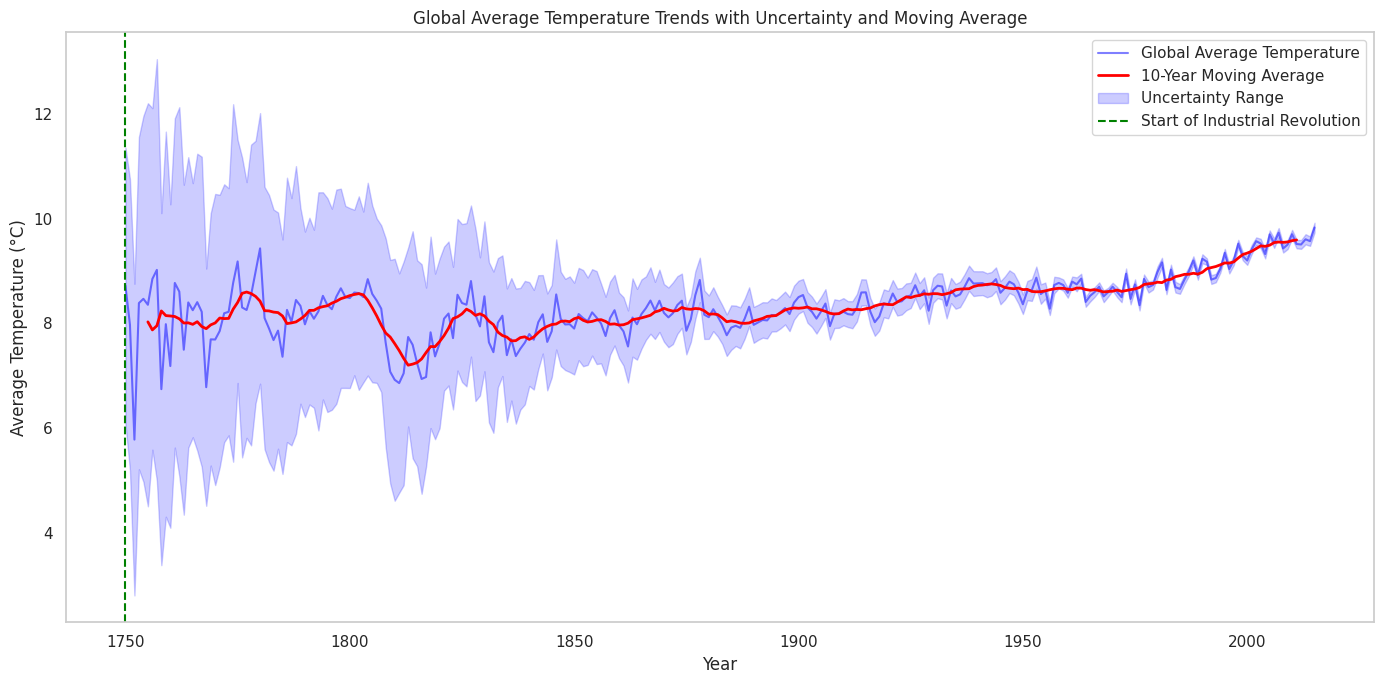

In [ ]:
# Group by year and calculate the average temperature for each year
annual_avg_temp = data_home2.groupby('Year')['LandAverageTemperature'].mean()
annual_temp_uncertainty = data_home2.groupby('Year')['LandAverageTemperatureUncertainty'].mean()

# Apply a moving average to smooth fluctuations
smoothed_temp = annual_avg_temp.rolling(window=10, center=True).mean()

# Plotting
plt.figure(figsize=(14, 7))

# Original data
plt.plot(annual_avg_temp, label='Global Average Temperature', color='blue', alpha=0.5)

# Smoothed data
plt.plot(smoothed_temp, label='10-Year Moving Average', color='red', linewidth=2)

# Add uncertainty as a shaded area
plt.fill_between(
    annual_avg_temp.index,
    annual_avg_temp - annual_temp_uncertainty,
    annual_avg_temp + annual_temp_uncertainty,
    color='blue',
    alpha=0.2,
    label='Uncertainty Range'
)

# Highlight specific periods (e.g., Industrial Revolution start)
plt.axvline(x=1750, color='green', linestyle='--', label='Start of Industrial Revolution')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Global Average Temperature Trends with Uncertainty and Moving Average')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Save and show the plot
plt.tight_layout()
plt.savefig('enhanced_temperature_trends.png')
plt.grid(False)
plt.show()

**Quest 2 Is there a correlation betweeen rising temperatures and specific regions (e.g,countries or cities)?**

In [ ]:
# Convert 'dt' column to datetime format and extract the year
df_country['dt'] = pd.to_datetime(df_country['dt'])
df_country['Year'] = df_country['dt'].dt.year

# Remove rows with missing temperature values
df_country = df_country.dropna(subset=['AverageTemperature'])

# Calculate annual average temperature by country
annual_avg_temp_country = df_country.groupby(['Country', 'Year'])['AverageTemperature'].mean().reset_index()

# Filter specific countries for analysis
selected_countries = ['United States', 'Brazil', 'China', 'India', 'Australia']
filtered_data = annual_avg_temp_country[annual_avg_temp_country['Country'].isin(selected_countries)]
filtered_data.head(n=20)

,Country,Year,AverageTemperature
2475,Australia,1852,20.188500
2476,Australia,1853,20.958250
2477,Australia,1854,20.284778
2478,Australia,1855,20.798636
2479,Australia,1856,21.148333
2480,Australia,1857,20.966417
2481,Australia,1858,21.329833
2482,Australia,1859,21.188917
2483,Australia,1860,21.245500
2484,Australia,1861,21.197500


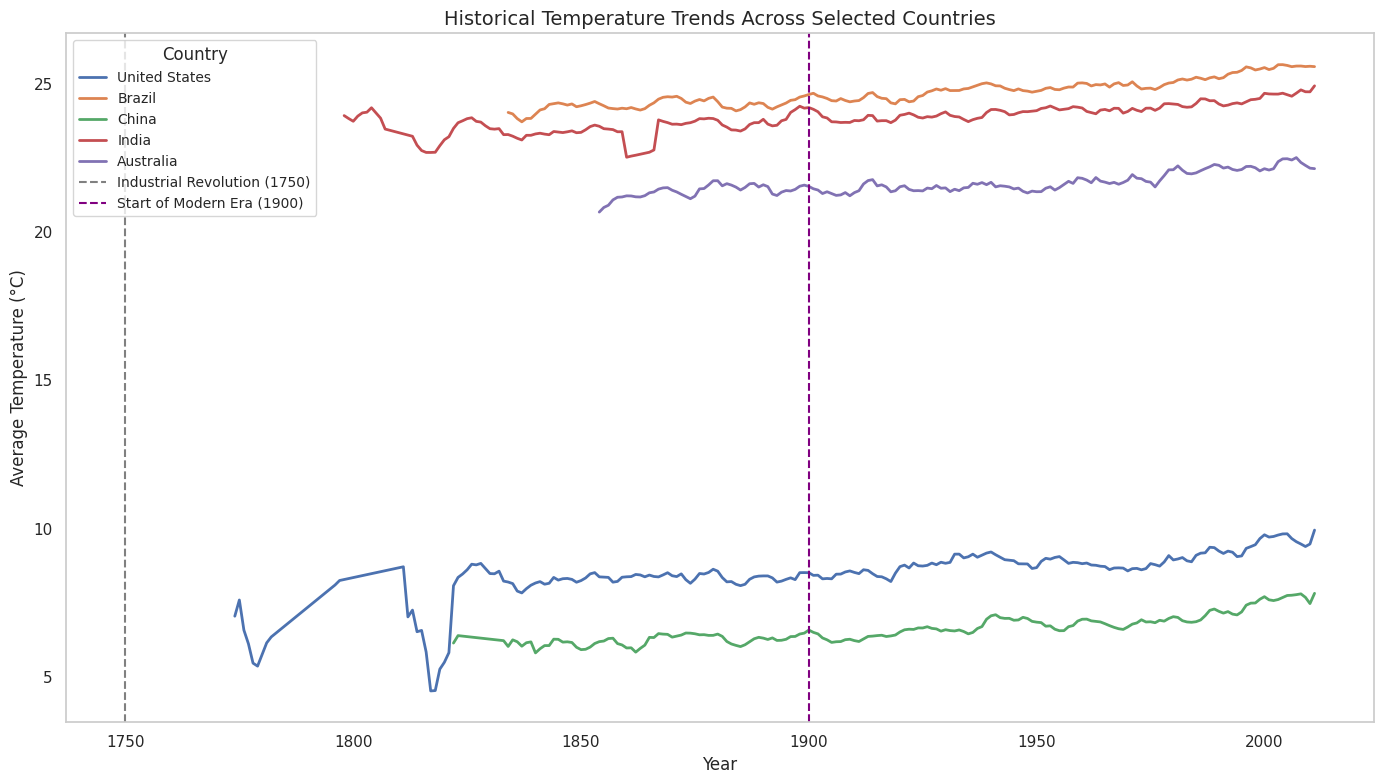

In [ ]:
# Enhanced visualization of temperature trends with improvements
plt.figure(figsize=(14, 8))

# Applying a moving average for smoothing (e.g., 5-year window)
for country in selected_countries:
    country_data = filtered_data[filtered_data['Country'] == country]
    smoothed_temp = country_data['AverageTemperature'].rolling(window=5, center=True).mean()
    plt.plot(country_data['Year'], smoothed_temp, label=country, linewidth=2)

# Adding annotations for key historical events
plt.axvline(x=1750, color='gray', linestyle='--', label='Industrial Revolution (1750)')
plt.axvline(x=1900, color='purple', linestyle='--', label='Start of Modern Era (1900)')

# Customizing title, labels, and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.title('Historical Temperature Trends Across Selected Countries', fontsize=14)
plt.legend(title="Country", fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

# Adding a more distinct color palette
plt.tight_layout()
plt.grid(False)
plt.show()


In [ ]:
correlations = {}
for country in selected_countries:
    country_data = annual_avg_temp_country[annual_avg_temp_country['Country'] == country]
    correlation = country_data['Year'].corr(country_data['AverageTemperature'])
    correlations[country] = correlation

print("Correlation between Year and Average Temperature:")
for country, corr_value in correlations.items():
    print(f"{country}: {corr_value:.2f}")

Correlation between Year and Average Temperature:
United States: 0.49
Brazil: 0.85
China: 0.74
India: 0.59
Australia: 0.66


**Quest 3 Which Regions show the highest tempearatures increase in recent decades?**

In [ ]:
# Convert the 'dt' column to datetime format and extract the year
df_country['dt'] = pd.to_datetime(df_country['dt'])
df_country['Year'] = df_country['dt'].dt.year

# Remove data with missing temperatures
df_country = df_country.dropna(subset=['AverageTemperature'])

# Filter for the last decades (example: 1980 to the present)
recent_data = df_country[df_country['Year'] >= 1980]

# Calculate the annual average temperature by country
annual_avg_temp_country = recent_data.groupby(['Country', 'Year'])['AverageTemperature'].mean().reset_index()

# Calculate the rate of temperature change for each country
# To do this, calculate the slope of the trend line for each country
temperature_trends = {}

for country in annual_avg_temp_country['Country'].unique():
    country_data = annual_avg_temp_country[annual_avg_temp_country['Country'] == country]
    if len(country_data) > 1:  # Ensure there is enough data for the calculation
        # Calculate the rate of change based on linear regression
        slope = (country_data['AverageTemperature'].iloc[-1] - country_data['AverageTemperature'].iloc[0]) / (country_data['Year'].iloc[-1] - country_data['Year'].iloc[0])
        temperature_trends[country] = slope

# Sort the countries by the highest rate of temperature increase
sorted_trends = sorted(temperature_trends.items(), key=lambda x: x[1], reverse=True)
annual_avg_temp_country

,Country,Year,AverageTemperature
0,Afghanistan,1980,14.887333
1,Afghanistan,1981,14.860083
2,Afghanistan,1982,13.733083
3,Afghanistan,1983,14.614833
4,Afghanistan,1984,14.245833
...,...,...,...
8223,Åland,2009,6.489083
8224,Åland,2010,4.861917
8225,Åland,2011,7.170750
8226,Åland,2012,6.063917


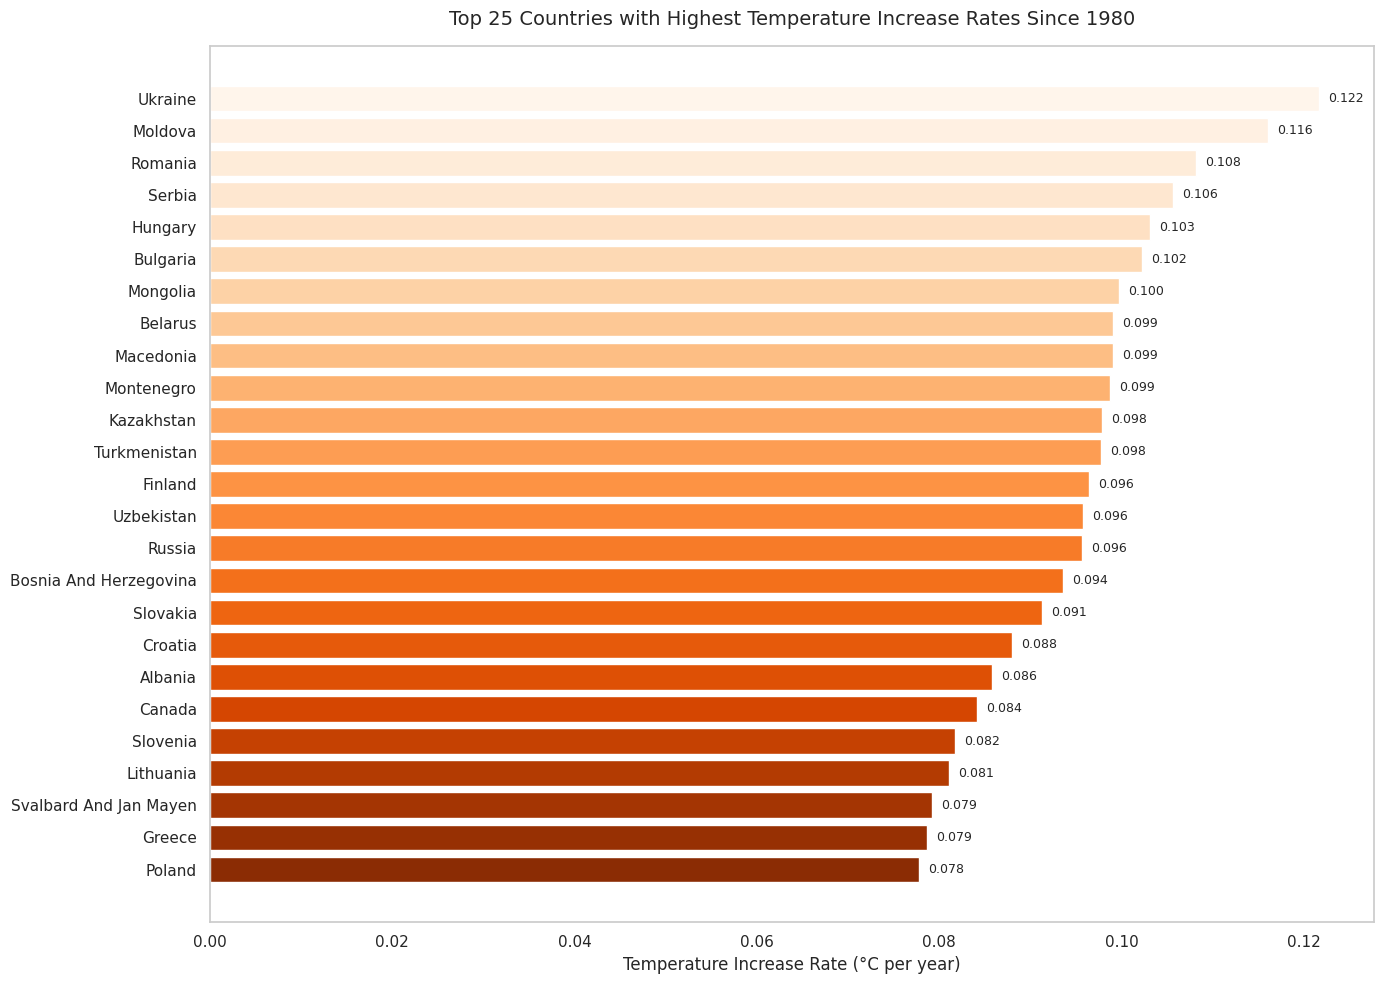

In [ ]:
# Improved visualization with enhancements

# Selecting the top 25 countries with the highest temperature increase rates
top_countries = sorted_trends[:25]
countries = [country for country, trend in top_countries]
trends = [trend for country, trend in top_countries]

plt.figure(figsize=(14, 10))

# Use a color gradient
colors = plt.cm.Oranges([i / len(countries) for i in range(len(countries))])
bars = plt.barh(countries, trends, color=colors)

# Add exact values at the end of each bar
for bar, trend in zip(bars, trends):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height() / 2,
             f'{trend:.3f}', va='center', fontsize=9)

# Enhancing labels and title
plt.xlabel('Temperature Increase Rate (°C per year)', fontsize=12)
plt.title('Top 25 Countries with Highest Temperature Increase Rates Since 1980', fontsize=14, pad=15)

# Adding grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Invert the y-axis for better readability
plt.gca().invert_yaxis()

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.grid(False)
plt.show()

**Quest 4 What is the relationship between temparature and uncertainty variables over time?**

<Figure size 1400x600 with 0 Axes>

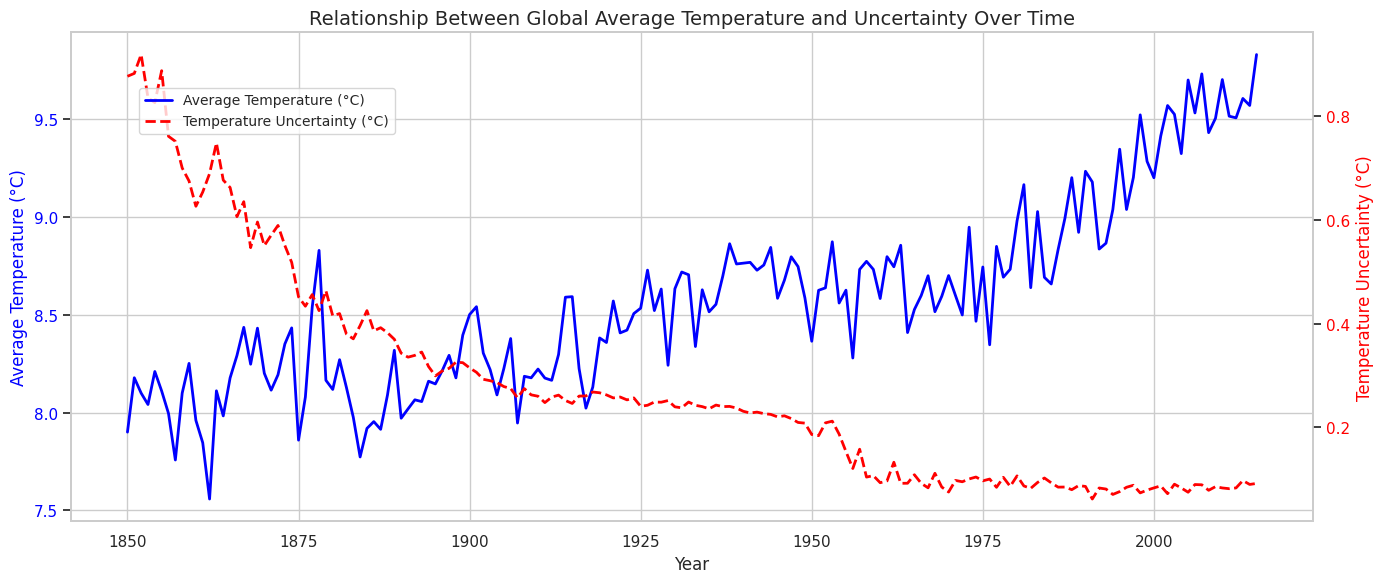

In [ ]:
# Convert 'dt' column to datetime format and extract the year
data_5['dt'] = pd.to_datetime(data_5['dt'])
data_5['Year'] = data_5['dt'].dt.year

# Remove rows with missing values in temperature and uncertainty
data_5 = data_5.dropna(subset=['LandAverageTemperature', 'LandAverageTemperatureUncertainty'])

# Group by year to calculate annual average temperature and uncertainty
annual_data = data_5.groupby('Year')[['LandAverageTemperature', 'LandAverageTemperatureUncertainty']].mean().reset_index()

# Enhanced visualization of the relationship between temperature and uncertainty
plt.figure(figsize=(14, 6))

# Plot temperature on the primary axis
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.plot(annual_data['Year'], annual_data['LandAverageTemperature'], label='Average Temperature (°C)', color='blue', linewidth=2)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Average Temperature (°C)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Add a secondary axis for uncertainty
ax2 = ax1.twinx()
ax2.plot(annual_data['Year'], annual_data['LandAverageTemperatureUncertainty'], label='Temperature Uncertainty (°C)', color='red', linestyle='--', linewidth=2)
ax2.set_ylabel('Temperature Uncertainty (°C)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add a title and improve the legend
plt.title('Relationship Between Global Average Temperature and Uncertainty Over Time', fontsize=14)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.85), fontsize=10)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.grid(False)
plt.show()

In [ ]:
correlation = annual_data['LandAverageTemperature'].corr(annual_data['LandAverageTemperatureUncertainty'])
print(f'Correlation between Average Temperature and Uncertainty: {correlation:.2f}')

Correlation between Average Temperature and Uncertainty: -0.68


**Quest 5 Have maximum and minimum tempraures consistently increased over time?**

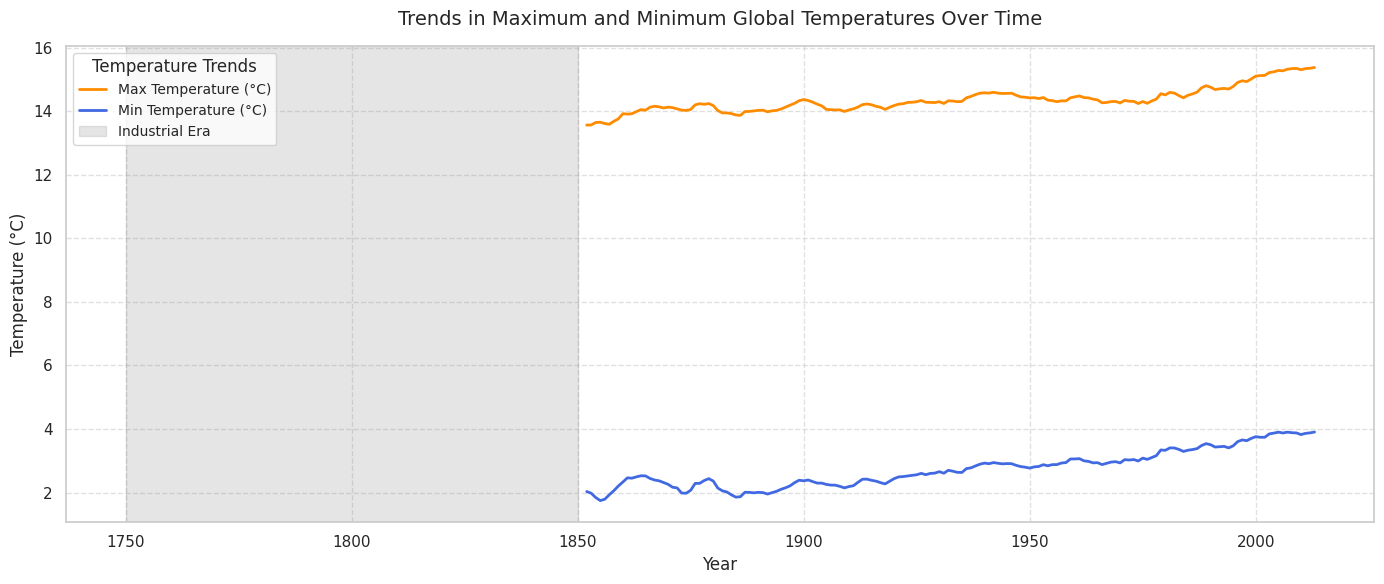

In [ ]:
# Convert 'dt' column to datetime format and extract the year
data_5['dt'] = pd.to_datetime(data_5['dt'])
data_5['Year'] = data_5['dt'].dt.year

# Remove rows with missing values in max and min temperatures
data_5 = data_5.dropna(subset=['LandMaxTemperature', 'LandMinTemperature'])

# Group by year to calculate annual average max and min temperatures
annual_temp = data_5.groupby('Year')[['LandMaxTemperature', 'LandMinTemperature']].mean().reset_index()

# Enhanced visualization with suggested improvements
plt.figure(figsize=(14, 6))

# Apply a moving average for smoothing (e.g., 5-year window)
smoothed_max_temp = annual_temp['LandMaxTemperature'].rolling(window=5, center=True).mean()
smoothed_min_temp = annual_temp['LandMinTemperature'].rolling(window=5, center=True).mean()

# Plot max and min temperatures with smoothing
plt.plot(annual_temp['Year'], smoothed_max_temp, label='Max Temperature (°C)', color='darkorange', linewidth=2)
plt.plot(annual_temp['Year'], smoothed_min_temp, label='Min Temperature (°C)', color='royalblue', linewidth=2)

# Highlight specific periods (e.g., Industrial Era)
plt.axvspan(1750, 1850, color='gray', alpha=0.2, label='Industrial Era')

# Add labels, title, and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.title('Trends in Maximum and Minimum Global Temperatures Over Time', fontsize=14, pad=15)
plt.legend(title="Temperature Trends", fontsize=10, loc='upper left')

# Add grid lines and improve aesthetics
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Calculate the annual rate of change for maximum and minimum temperatures
annual_temp['MaxTempChange'] = annual_temp['LandMaxTemperature'].diff()
annual_temp['MinTempChange'] = annual_temp['LandMinTemperature'].diff()

# Calculate the percentage of years with a positive increase in max and min temperatures
max_increase_percentage = (annual_temp['MaxTempChange'] > 0).mean() * 100
min_increase_percentage = (annual_temp['MinTempChange'] > 0).mean() * 100

print(f'Percentage of years with increase in Max Temperature: {max_increase_percentage:.2f}%')
print(f'Percentage of years with increase in Min Temperature: {min_increase_percentage:.2f}%')

Percentage of years with increase in Max Temperature: 57.23%
Percentage of years with increase in Min Temperature: 55.42%


**Quest 6 Which periods and regions have the highest uncertainties in temperature measurements?**

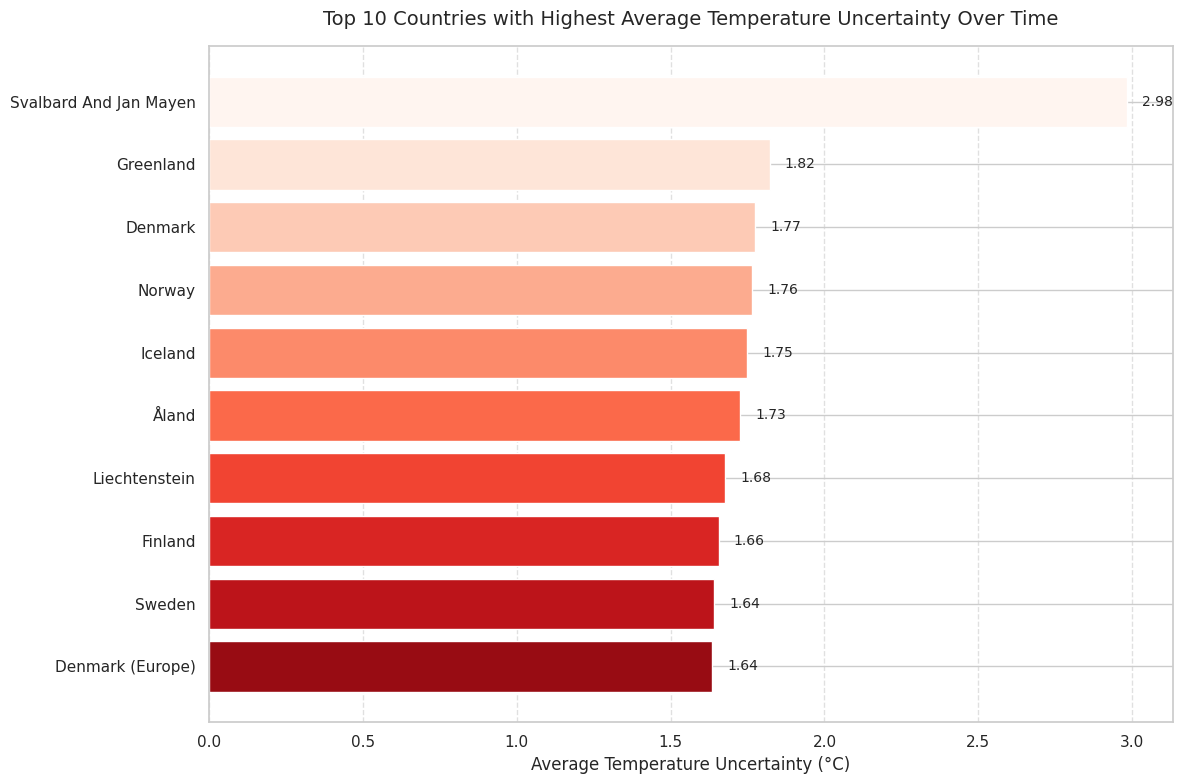

,AverageTemperatureUncertainty
Country,
Svalbard And Jan Mayen,2.982169
Greenland,1.821422
Denmark,1.772881
Norway,1.763899
Iceland,1.747089
Åland,1.726378
Liechtenstein,1.675850
Finland,1.655766
Sweden,1.641920


In [ ]:
# Convert 'dt' column to datetime format and extract the year
df_country['dt'] = pd.to_datetime(df_country['dt'])
df_country['Year'] = df_country['dt'].dt.year

# Remove rows with missing uncertainty values
df_country = df_country.dropna(subset=['AverageTemperatureUncertainty'])

# Calculate annual average uncertainty by country
annual_uncertainty_country = df_country.groupby(['Country', 'Year'])['AverageTemperatureUncertainty'].mean().reset_index()

# Identify the 10 countries with the highest average uncertainty over the period
top_uncertainty_countries = (annual_uncertainty_country.groupby('Country')['AverageTemperatureUncertainty'].mean().nlargest(10))

# Improved visualization of countries with the highest temperature uncertainty
plt.figure(figsize=(12, 8))

# Use color gradients
colors = plt.cm.Reds([i / len(top_uncertainty_countries) for i in range(len(top_uncertainty_countries))])

# Plot horizontal bar chart
bars = plt.barh(top_uncertainty_countries.index, top_uncertainty_countries.values, color=colors)

# Add exact values at the end of each bar
for bar, value in zip(bars, top_uncertainty_countries.values):
    plt.text(value + 0.05, bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center', fontsize=10)

# Add labels and title
plt.xlabel('Average Temperature Uncertainty (°C)', fontsize=12)
plt.title('Top 10 Countries with Highest Average Temperature Uncertainty Over Time', fontsize=14, pad=15)

# Add a grid for better comparison
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Invert y-axis for better readability
plt.gca().invert_yaxis()

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

top_uncertainty_countries


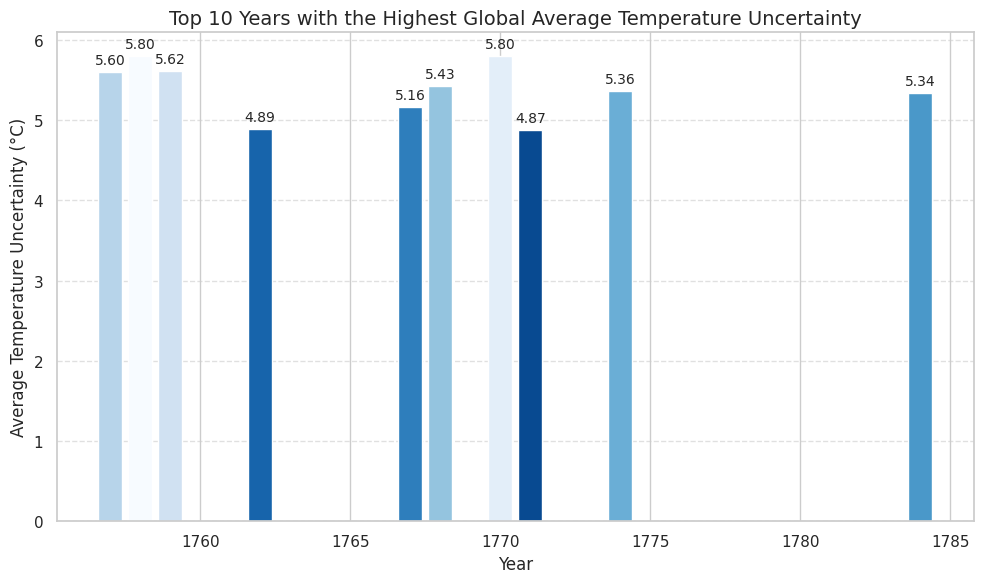

In [ ]:
# Improved visualization for the top 10 years with the highest temperature uncertainty
import matplotlib.pyplot as plt

# Assuming df_country is your DataFrame with temperature data
# Convert 'dt' column to datetime format and extract the year
df_country['dt'] = pd.to_datetime(df_country['dt'])
df_country['Year'] = df_country['dt'].dt.year

# Calculate annual average uncertainty
annual_uncertainty = df_country.groupby('Year')['AverageTemperatureUncertainty'].mean().reset_index()

# Get the top 10 years with the highest uncertainty
top_uncertainty_years = annual_uncertainty.nlargest(10, 'AverageTemperatureUncertainty')


plt.figure(figsize=(10, 6))

# Apply a gradient color scheme
colors = plt.cm.Blues([i / len(top_uncertainty_years) for i in range(len(top_uncertainty_years))])

# Create the bar chart
bars = plt.bar(top_uncertainty_years['Year'], top_uncertainty_years['AverageTemperatureUncertainty'], color=colors)

# Add exact values on top of each bar
for bar, value in zip(bars, top_uncertainty_years['AverageTemperatureUncertainty']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             f'{value:.2f}', ha='center', fontsize=10)

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature Uncertainty (°C)', fontsize=12)
plt.title('Top 10 Years with the Highest Global Average Temperature Uncertainty', fontsize=14)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

**Quest 7 What is the temperature difference between the land average and the land-ocean average?**

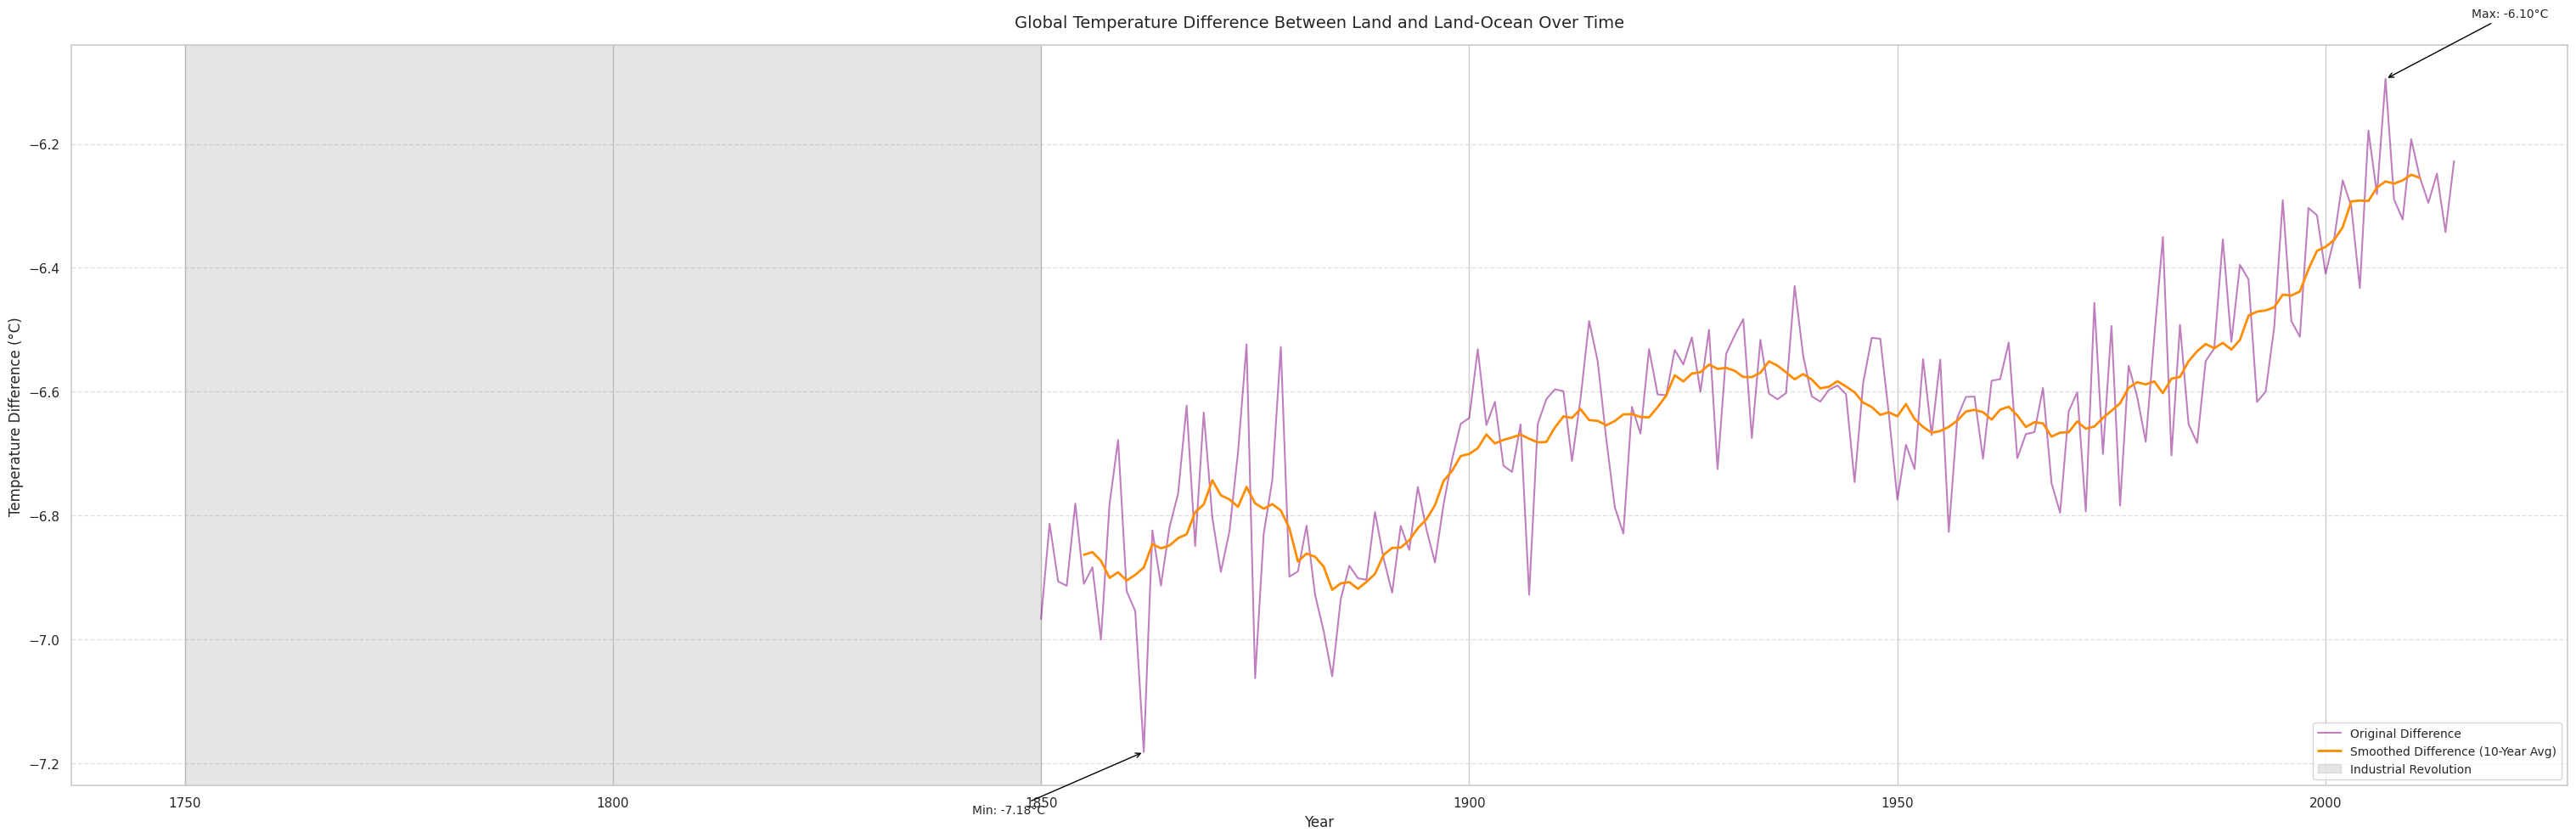

In [ ]:
# Calculate the difference between land average temperature and land-ocean average temperature
data_5['TemperatureDifference'] = data_5['LandAverageTemperature'] - data_5['LandAndOceanAverageTemperature']

# Group by year to calculate the annual average temperature difference
annual_difference = data_5.groupby('Year')['TemperatureDifference'].mean().reset_index()

# Improved visualization of temperature difference with enhancements
plt.figure(figsize=(30.5, 10))

# Apply a moving average (e.g., 10 years) for smoothing
annual_difference['SmoothedDifference'] = annual_difference['TemperatureDifference'].rolling(window=10, center=True).mean()

# Plot the original data
plt.plot(annual_difference['Year'], annual_difference['TemperatureDifference'], color='purple', alpha=0.5, label='Original Difference')

# Plot the smoothed trend
plt.plot(annual_difference['Year'], annual_difference['SmoothedDifference'], color='darkorange', linewidth=2, label='Smoothed Difference (10-Year Avg)')

# Highlight specific periods (e.g., industrial revolution)
plt.axvspan(1750, 1850, color='gray', alpha=0.2, label='Industrial Revolution')

# Add annotations for key points
max_diff = annual_difference.loc[annual_difference['TemperatureDifference'].idxmax()]
min_diff = annual_difference.loc[annual_difference['TemperatureDifference'].idxmin()]
plt.annotate(f'Max: {max_diff["TemperatureDifference"]:.2f}°C',
             xy=(max_diff['Year'], max_diff['TemperatureDifference']),
             xytext=(max_diff['Year'] + 10, max_diff['TemperatureDifference'] + 0.1),
             arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)
plt.annotate(f'Min: {min_diff["TemperatureDifference"]:.2f}°C',
             xy=(min_diff['Year'], min_diff['TemperatureDifference']),
             xytext=(min_diff['Year'] - 20, min_diff['TemperatureDifference'] - 0.1),
             arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)

# Add labels, title, and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Difference (°C)', fontsize=12)
plt.title('Global Temperature Difference Between Land and Land-Ocean Over Time', fontsize=14, pad=15)
plt.legend(fontsize=10)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


**Data Analysis focused on Brazil**

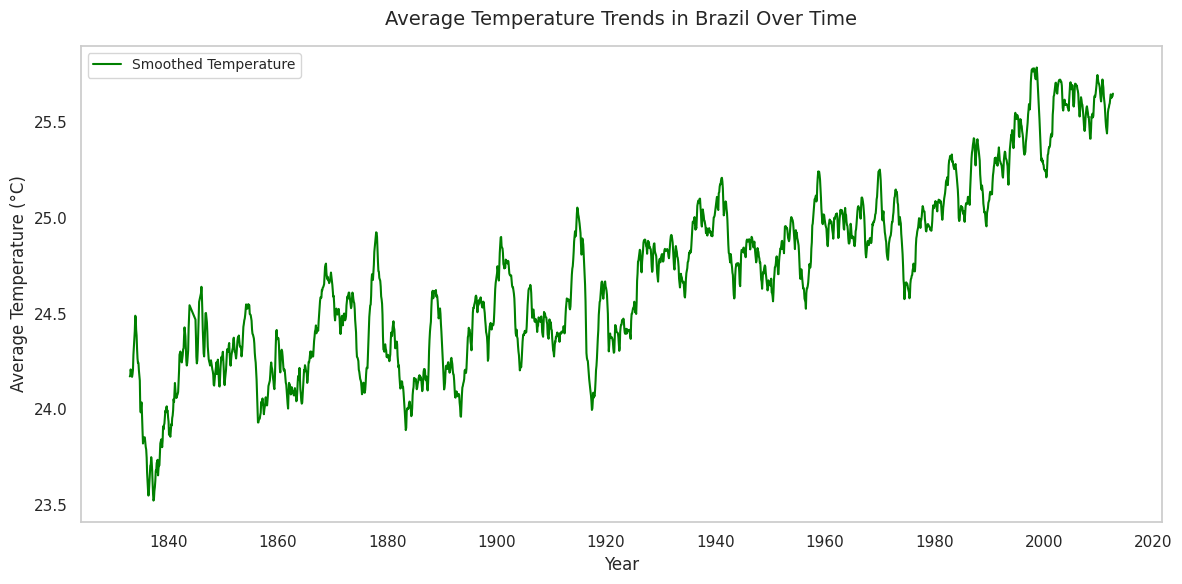

In [ ]:
# Filter the data for Brazil and remove rows with missing temperature values
df_brazil = df_country[df_country['Country'] == 'Brazil'].dropna(subset=['AverageTemperature'])

# Smoothing the temperature data using a rolling average
df_brazil['SmoothedTemperature'] = df_brazil['AverageTemperature'].rolling(window=25, center=True).mean()

# Plot the smoothed temperature trend
plt.figure(figsize=(12, 6))
sns.lineplot(x="dt", y="SmoothedTemperature", data=df_brazil, color="green", label="Smoothed Temperature")

# Add annotations for key points
max_temp = df_brazil.loc[df_brazil['AverageTemperature'].idxmax()]
min_temp = df_brazil.loc[df_brazil['AverageTemperature'].idxmin()]
plt.annotate(f'Max: {max_temp["AverageTemperature"]:.2f}°C',
             xy=(max_temp['dt'], max_temp['AverageTemperature']),
             xytext=(max_temp['dt'], max_temp['AverageTemperature'] + 1),
             arrowprops=dict(arrowstyle='->', color='black'))
plt.annotate(f'Min: {min_temp["AverageTemperature"]:.2f}°C',
             xy=(min_temp['dt'], min_temp['AverageTemperature']),
             xytext=(min_temp['dt'], min_temp['AverageTemperature'] - 1),
             arrowprops=dict(arrowstyle='->', color='black'))

# Add labels, title, and grid
plt.title("Average Temperature Trends in Brazil Over Time", fontsize=14, pad=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(fontsize=10)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.grid(False)
plt.show()

In [ ]:
df_brazil.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year,SmoothedTemperature
77110,1832-01-01,24.935,1.372,Brazil,1832,NaN
77111,1832-02-01,24.505,1.953,Brazil,1832,NaN
77112,1832-03-01,24.617,1.359,Brazil,1832,NaN
77113,1832-04-01,23.990,2.013,Brazil,1832,NaN
77114,1832-05-01,23.124,1.592,Brazil,1832,NaN


**Analyzing the Average Temperature Trend Over Time**

i. We can calculate the average annual temperature in Brazil to see if there is an increasing trend.

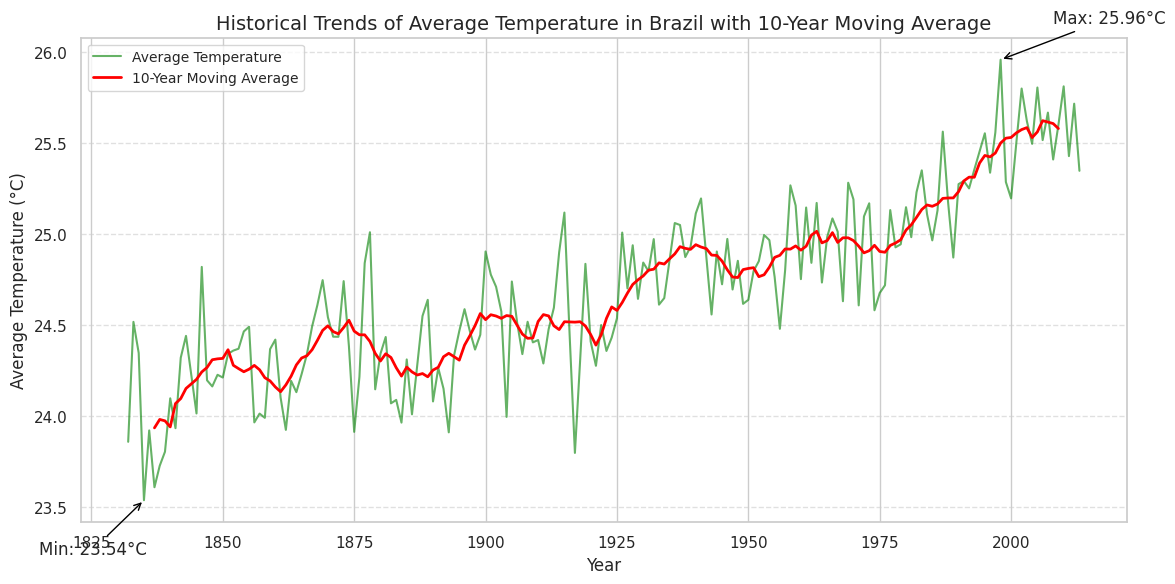

In [ ]:
# Filter data for Brazil
df_brazil = df_country[df_country['Country'] == 'Brazil']

# Calculate annual average temperature for Brazil
annual_temp_brazil = df_brazil.groupby('Year')['AverageTemperature'].mean().reset_index()

# Apply a moving average for smoothing (e.g., 10 years)
annual_temp_brazil['10-Year Moving Average'] = annual_temp_brazil['AverageTemperature'].rolling(window=10, center=True).mean()

# Plot the original data and the 10-year moving average
plt.figure(figsize=(12, 6))
plt.plot(annual_temp_brazil['Year'], annual_temp_brazil['AverageTemperature'], color='green', label='Average Temperature', alpha=0.6)
plt.plot(annual_temp_brazil['Year'], annual_temp_brazil['10-Year Moving Average'], color='red', linewidth=2, label='10-Year Moving Average')

# Annotate key points
max_temp = annual_temp_brazil.loc[annual_temp_brazil['AverageTemperature'].idxmax()]
min_temp = annual_temp_brazil.loc[annual_temp_brazil['AverageTemperature'].idxmin()]
plt.annotate(f'Max: {max_temp["AverageTemperature"]:.2f}°C',xy=(max_temp['Year'], max_temp['AverageTemperature']),
             xytext=(max_temp['Year'] + 10, max_temp['AverageTemperature'] + 0.2), arrowprops=dict(arrowstyle='->',
                                                                                                   color='black'))

plt.annotate(f'Min: {min_temp["AverageTemperature"]:.2f}°C',xy=(min_temp['Year'], min_temp['AverageTemperature']),
             xytext=(min_temp['Year'] - 20, min_temp['AverageTemperature'] - 0.3), arrowprops=dict(arrowstyle='->',
                                                                                                   color='black'))

# Add labels, title, and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.title('Historical Trends of Average Temperature in Brazil with 10-Year Moving Average', fontsize=14)
plt.legend(fontsize=10)

# Add horizontal gridlines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

**Step 3: Analyze the Variation of Uncertainty in the Measurements**

We can also check the AverageTemperatureUncertainty column to understand how the uncertainty in the temperature measurements has varied over time.

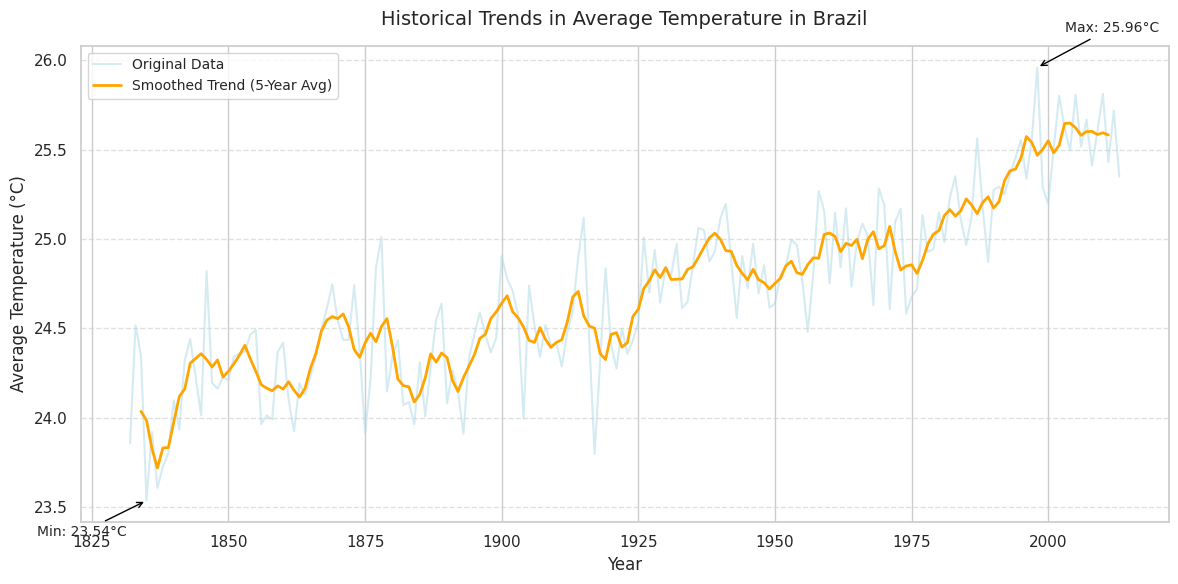

In [ ]:
# Improved visualization for the average temperature trend in Brazil
plt.figure(figsize=(12, 6))

# Apply a moving average for smoothing (e.g., 5-year window)
annual_temp_brazil['SmoothedTemperature'] = annual_temp_brazil['AverageTemperature'].rolling(window=5, center=True).mean()

# Plot the original data
plt.plot(annual_temp_brazil['Year'], annual_temp_brazil['AverageTemperature'], color='lightblue', alpha=0.5, label='Original Data')

# Plot the smoothed trend
plt.plot(annual_temp_brazil['Year'], annual_temp_brazil['SmoothedTemperature'], color='orange', linewidth=2, label='Smoothed Trend (5-Year Avg)')

# Highlight key points
max_temp = annual_temp_brazil.loc[annual_temp_brazil['AverageTemperature'].idxmax()]
min_temp = annual_temp_brazil.loc[annual_temp_brazil['AverageTemperature'].idxmin()]
plt.annotate(f'Max: {max_temp["AverageTemperature"]:.2f}°C',
             xy=(max_temp['Year'], max_temp['AverageTemperature']),
             xytext=(max_temp['Year'] + 5, max_temp['AverageTemperature'] + 0.2),
             arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)
plt.annotate(f'Min: {min_temp["AverageTemperature"]:.2f}°C',
             xy=(min_temp['Year'], min_temp['AverageTemperature']),
             xytext=(min_temp['Year'] - 20, min_temp['AverageTemperature'] - 0.2),
             arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)

# Add labels, title, and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.title('Historical Trends in Average Temperature in Brazil', fontsize=14, pad=15)
plt.legend(fontsize=10)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


**Step 4: Identify Decades with Largest Temperature Increases**

To see if specific decades had larger temperature increases, we can calculate the average temperature for each decade.

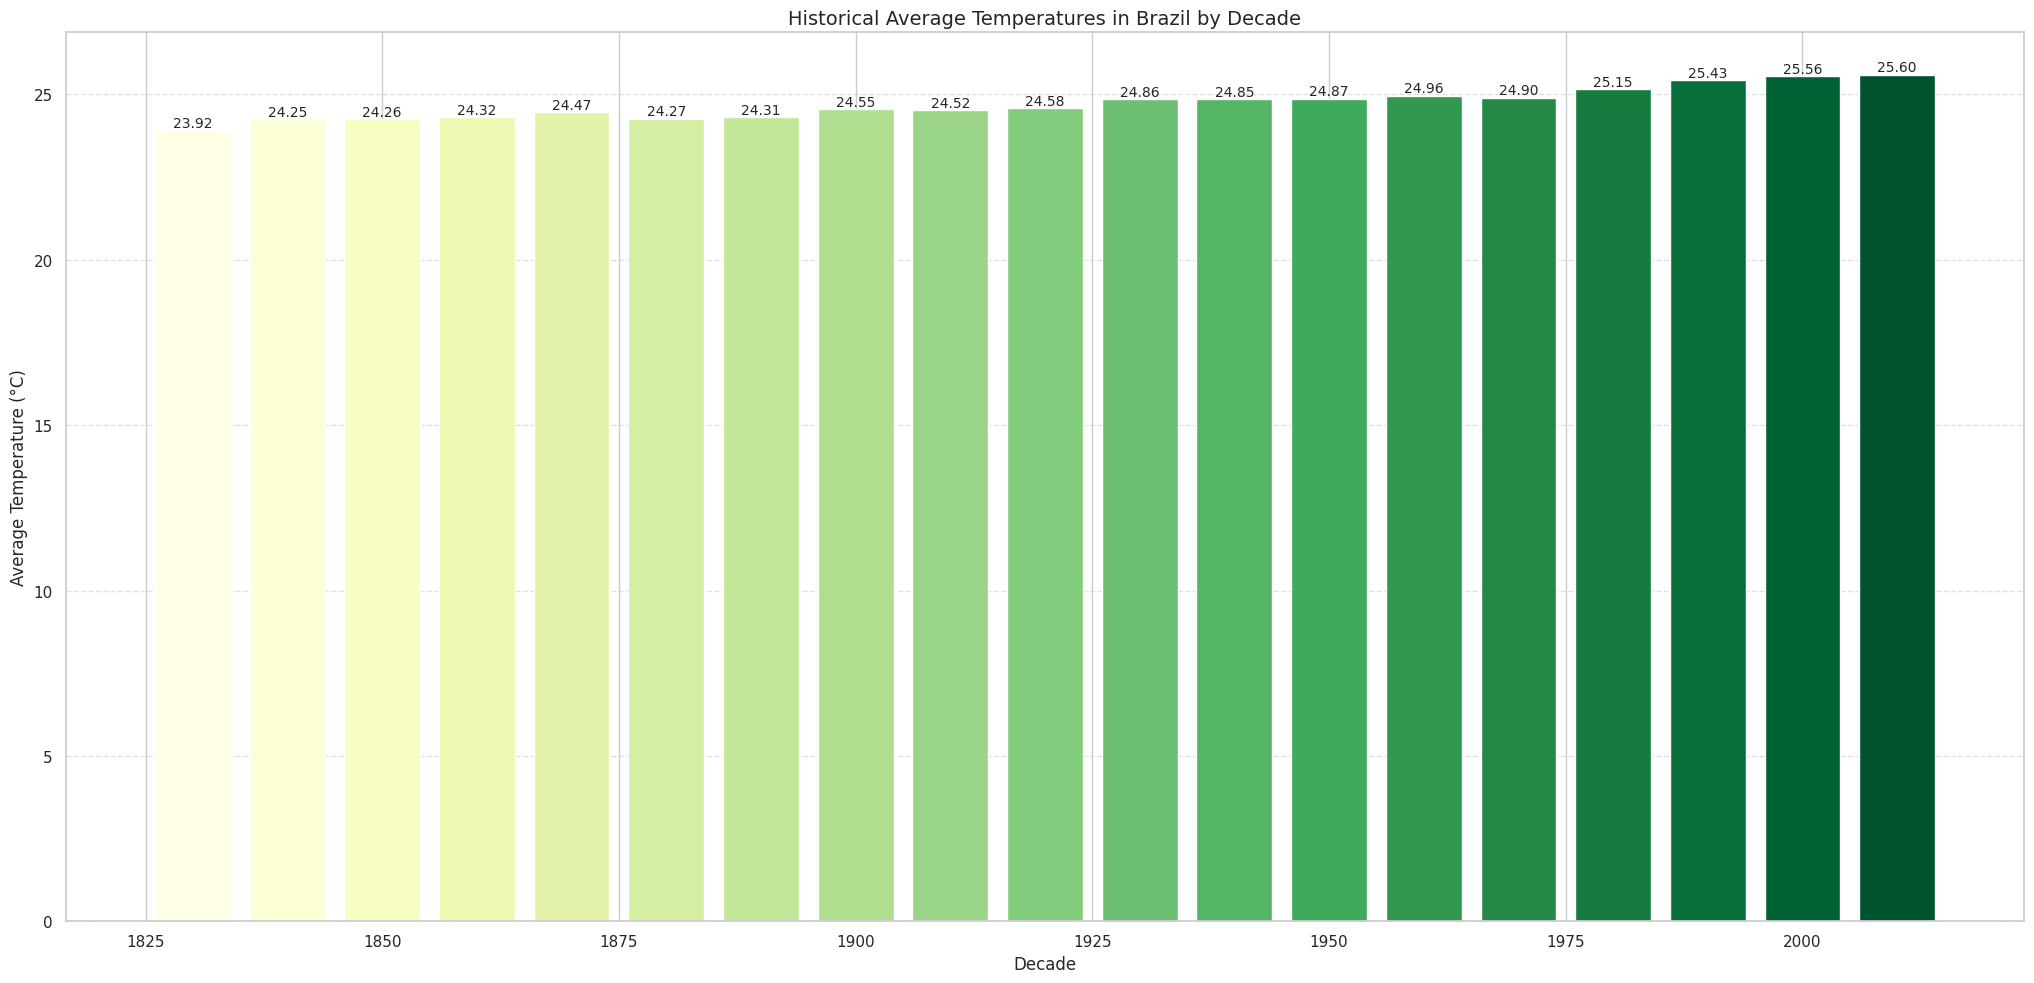

In [ ]:
# Create a Decade column
df_brazil['Decade'] = (df_brazil['Year'] // 10) * 10

# Calculate the average temperature per decade in Brazil
decade_avg_temp_brazil = df_brazil.groupby('Decade')['AverageTemperature'].mean().reset_index()

# Improved visualization of average temperature by decade in Brazil
plt.figure(figsize=(20.5, 10))

# Plot the bar chart with a gradient color
colors = plt.cm.YlGn([i / len(decade_avg_temp_brazil) for i in range(len(decade_avg_temp_brazil))])
bars = plt.bar(decade_avg_temp_brazil['Decade'], decade_avg_temp_brazil['AverageTemperature'], color=colors, width=8)

# Add exact values on top of each bar
for bar, temp in zip(bars, decade_avg_temp_brazil['AverageTemperature']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             f'{temp:.2f}', ha='center', fontsize=10)

# Add labels and title
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.title('Historical Average Temperatures in Brazil by Decade', fontsize=14)

# Add horizontal gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

**Step 5: Comparison between Temperatures from Different Decades**

To understand the magnitude of climate change in Brazil, we can calculate the average temperature increase over the decades and compare the values.

In [ ]:
# Calculate the average temperature increase from one decade to the next
decade_avg_temp_brazil['TempIncrease'] = decade_avg_temp_brazil['AverageTemperature'].diff()

# Display the table with the decades and the temperature increase
print(decade_avg_temp_brazil[['Decade', 'AverageTemperature', 'TempIncrease']])

    Decade  AverageTemperature  TempIncrease
0     1830           23.915208           NaN
1     1840           24.252590      0.337382
2     1850           24.258143      0.005552
3     1860           24.319183      0.061040
4     1870           24.466858      0.147675
5     1880           24.268942     -0.197917
6     1890           24.307367      0.038425
7     1900           24.548292      0.240925
8     1910           24.518492     -0.029800
9     1920           24.580733      0.062242
10    1930           24.864225      0.283492
11    1940           24.851642     -0.012583
12    1950           24.872300      0.020658
13    1960           24.964500      0.092200
14    1970           24.904792     -0.059708
15    1980           25.153125      0.248333
16    1990           25.432500      0.279375
17    2000           25.562067      0.129567
18    2010           25.597409      0.035342


**Calculate the Moving Average Climate Brazil**

In [ ]:
# Convert the 'dt' column to datetime and extract the year
df_country['dt'] = pd.to_datetime(df_country['dt'])
df_country['Year'] = df_country['dt'].dt.year

# Filter data for Brazil and remove rows with missing temperature values
df_brazil = df_country[df_country['Country'] == 'Brazil'].dropna(subset=['AverageTemperature'])

# Calculate the annual average temperature in Brazil
annual_temp_brazil = df_brazil.groupby('Year')['AverageTemperature'].mean().reset_index()

# Calculate the 10-year moving average
annual_temp_brazil['10-Year Moving Average'] = annual_temp_brazil['AverageTemperature'].rolling(window=10).mean()
annual_temp_brazil.head(n=20)

,Year,AverageTemperature,10-Year Moving Average
0,1832,23.858583,NaN
1,1833,24.517833,NaN
2,1834,24.346750,NaN
3,1835,23.537500,NaN
4,1836,23.921167,NaN
5,1837,23.608917,NaN
6,1838,23.726917,NaN
7,1839,23.804000,NaN
8,1840,24.097583,NaN
9,1841,23.933500,23.935275


**Step 2: Visualize the Moving Average**

Now let's plot the annual average temperature time series along with the moving average to see the long-term trend.

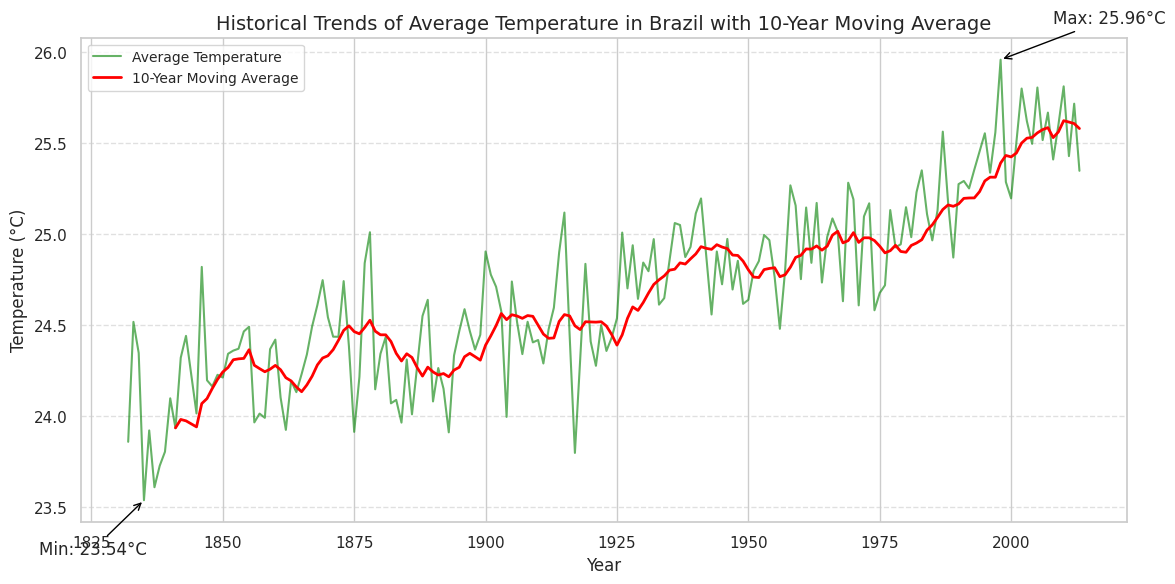

In [ ]:
# Enhanced visualization of the temperature trend in Brazil with 10-Year Moving Average
plt.figure(figsize=(12, 6))

# Plot the original data and the 10-year moving average
plt.plot(annual_temp_brazil['Year'], annual_temp_brazil['AverageTemperature'], color='green', label='Average Temperature', alpha=0.6)
plt.plot(annual_temp_brazil['Year'], annual_temp_brazil['10-Year Moving Average'], color='red', linewidth=2, label='10-Year Moving Average')

# Highlight key points
max_temp = annual_temp_brazil.loc[annual_temp_brazil['AverageTemperature'].idxmax()]
min_temp = annual_temp_brazil.loc[annual_temp_brazil['AverageTemperature'].idxmin()]
plt.annotate(f'Max: {max_temp["AverageTemperature"]:.2f}°C',
             xy=(max_temp['Year'], max_temp['AverageTemperature']),
             xytext=(max_temp['Year'] + 10, max_temp['AverageTemperature'] + 0.2),
             arrowprops=dict(arrowstyle='->', color='black'))
plt.annotate(f'Min: {min_temp["AverageTemperature"]:.2f}°C',
             xy=(min_temp['Year'], min_temp['AverageTemperature']),
             xytext=(min_temp['Year'] - 20, min_temp['AverageTemperature'] - 0.3),
             arrowprops=dict(arrowstyle='->', color='black'))

# Add labels, title, and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.title('Historical Trends of Average Temperature in Brazil with 10-Year Moving Average', fontsize=14)
plt.legend(fontsize=10)

# Add horizontal gridlines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

**PREPROCESSSING**

In [ ]:
data1 = pd.read_csv("/GlobalLandTemperaturesByCity.csv")
data1

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
5845627,1965-04-01,28.479,0.469,Phan Thiet,Vietnam,10.45N,107.18E
5845628,1965-05-01,28.444,0.416,Phan Thiet,Vietnam,10.45N,107.18E
5845629,1965-06-01,28.342,0.375,Phan Thiet,Vietnam,10.45N,107.18E
5845630,1965-07-01,28.282,0.228,Phan Thiet,Vietnam,10.45N,107.18E


In [ ]:
# Convert column 'dt' to datetime type and set as index
data1['dt'] = pd.to_datetime(data1['dt'], format='%Y-%m-%d', errors='coerce') # Specifying format and handling errors
data1 = data1.set_index('dt')

In [ ]:
# Check the index and index type
print("Current DataFrame index:", data1.index)
print("Index data type:", type(data1.index))

# View the first few rows of the DataFrame to confirm that the index is a date
data1.head()

Current DataFrame index: DatetimeIndex(['1743-11-01', '1743-12-01', '1744-01-01', '1744-02-01',
               '1744-03-01', '1744-04-01', '1744-05-01', '1744-06-01',
               '1744-07-01', '1744-08-01',
               ...
               '1964-11-01', '1964-12-01', '1965-01-01', '1965-02-01',
               '1965-03-01', '1965-04-01', '1965-05-01', '1965-06-01',
               '1965-07-01',        'NaT'],
              dtype='datetime64[ns]', name='dt', length=5845632, freq=None)
Index data type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [ ]:
# Sort the DataFrame by index (column 'dt')
data1 = data1.sort_index()

# Resample the data to a monthly frequency and fill gaps with interpolation
data_monthly = data1['AverageTemperature'].resample('MS').mean()

# Interpolate missing values ​​(optional, if you want a complete series)
data_monthly = data_monthly.interpolate(method='linear')

# Check the resampled data
print(data_monthly.head(20))

dt
1743-11-01     5.139185
1743-12-01     6.077003
1744-01-01     7.014821
1744-02-01     7.952639
1744-03-01     8.890457
1744-04-01     9.828275
1744-05-01    12.752819
1744-06-01    16.895032
1744-07-01    18.848604
1744-08-01    16.628701
1744-09-01    14.408798
1744-10-01     8.927596
1744-11-01     4.850252
1744-12-01     0.369000
1745-01-01    -1.868546
1745-02-01    -1.006237
1745-03-01     2.209770
1745-04-01     7.849492
1745-05-01     7.709780
1745-06-01     7.570067
Name: AverageTemperature, dtype: float64


In [ ]:
# Filter data from January 2013
data_monthly_2013 = data_monthly.loc['2013-01-01':]

# Check the result
print(data_monthly_2013.head())

dt
2013-01-01    12.111456
2013-02-01    13.663306
2013-03-01    16.088761
2013-04-01    19.142464
2013-05-01    22.095589
Name: AverageTemperature, dtype: float64


In [ ]:
# Remove missing values, if any
data_monthly = data_monthly.dropna()

**Test  dickey-fuller**

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the augmented Dickey-Fuller test
result = adfuller(data_monthly)

# Display results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f' {key}: {value}')

ADF Statistic: -2.429812078027065
p-value: 0.13349832854771604
Critical Values:
 1%: -3.432388161120837
 5%: -2.862440536429695
 10%: -2.5672493755233123


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Step 1: Perform the ADF test
result = adfuller(data_monthly)

# Step 2: Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Values:', key, value)

# Step 3: Interpret the results
if result[1] < 0.05:
    print("The series is stationary (reject the null hypothesis of a unit root).")
else:
    print("The series is not stationary (fail to reject the null hypothesis of a unit root).")

ADF Statistic: -2.429812078027065
p-value: 0.13349832854771604
Critical Values: 1% -3.432388161120837
Critical Values: 5% -2.862440536429695
Critical Values: 10% -2.5672493755233123
The series is not stationary (fail to reject the null hypothesis of a unit root).


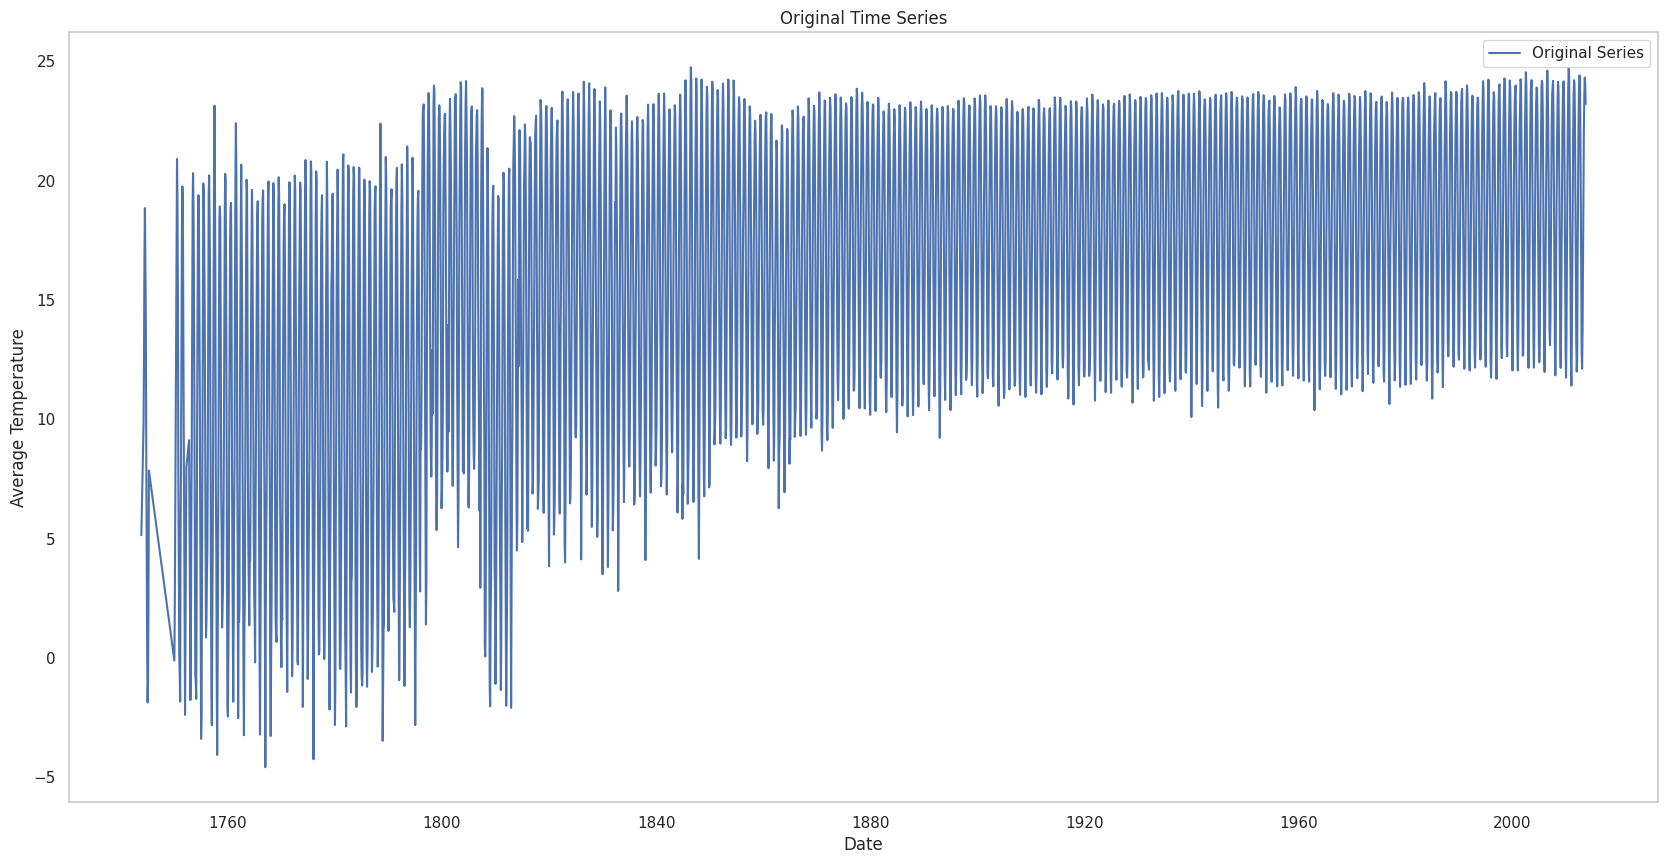

In [ ]:
# Plot the original series
plt.figure(figsize=(20.5, 10))
plt.plot(data_monthly, label='Original Series')
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.legend()
plt.grid(False)
plt.show()

ADF Statistic (differenced): -12.32795006763521
p-value (differenced): 6.524470157694967e-23
Critical Values: 1% -3.4323900686602644
Critical Values: 5% -2.8624413789638763
Critical Values: 10% -2.567249824072145
The differenced series is stationary (reject the null hypothesis of a unit root).


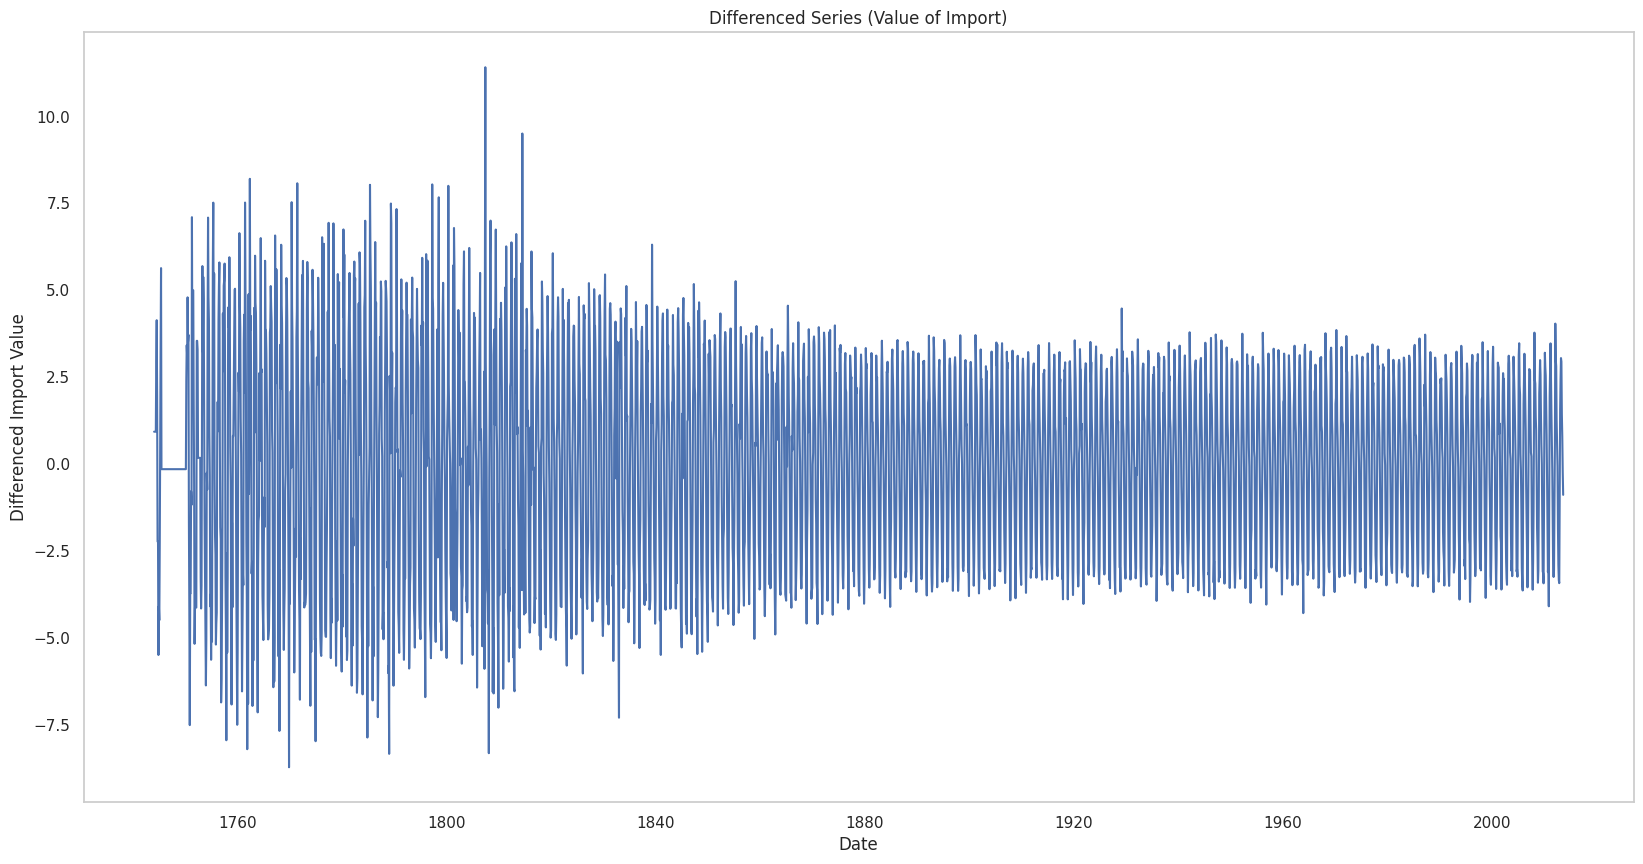

In [ ]:
# Step 1: Apply first-order differencing
df_diff = data_monthly.diff().dropna()

# Step 2: Perform the ADF test on the differenced data
result_diff = adfuller(df_diff)

# Step 3: Print the test results
print('ADF Statistic (differenced):', result_diff[0])
print('p-value (differenced):', result_diff[1])
for key, value in result_diff[4].items():
    print('Critical Values:', key, value)

# Step 4: Interpret the results
if result_diff[1] < 0.05:
    print("The differenced series is stationary (reject the null hypothesis of a unit root).")
else:
    print("The differenced series is still not stationary (fail to reject the null hypothesis of a unit root).")

# Step 5: Plot the differenced series
plt.figure(figsize=(20, 10))
plt.plot(df_diff)
plt.title('Differenced Series (Value of Import)')
plt.xlabel('Date')
plt.ylabel('Differenced Import Value')
plt.grid()
plt.show()

**Checking time series**

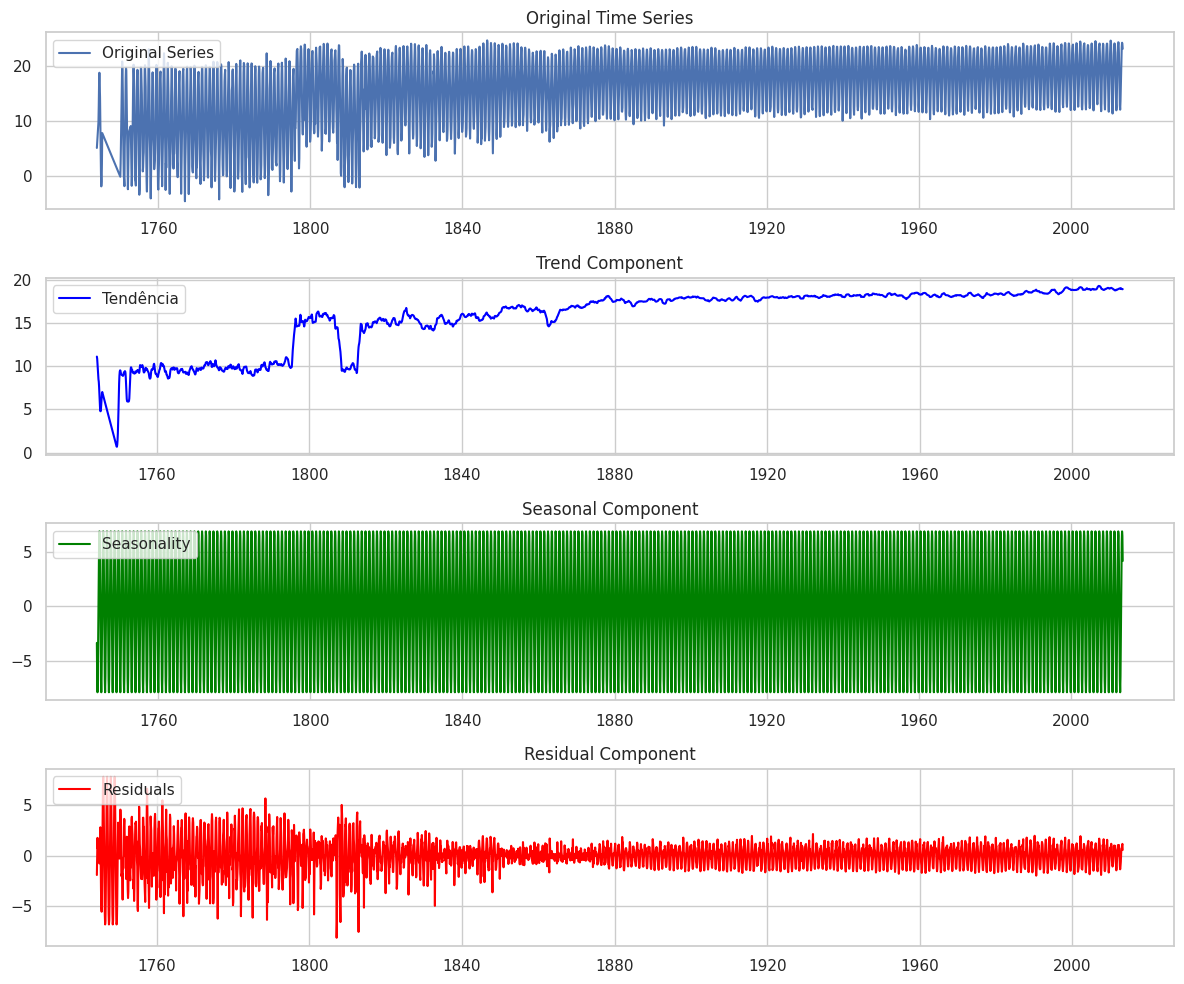

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
# Period = 12 for monthly seasonality
decomposition = seasonal_decompose(data_monthly, model='additive', period=12)

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 10))

# Original Series
plt.subplot(4, 1, 1)
plt.plot(data_monthly, label='Original Series')
plt.legend(loc='upper left')
plt.title('Original Time Series')

# Trend
plt.subplot(4, 1, 2)
plt.plot(trend, label='Tendência', color='blue')
plt.legend(loc='upper left')
plt.title('Trend Component')

# Seasonality
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

# Residuals
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

**Section A) Model time series**

**AutoARIMA Model**

In [ ]:
%%time

import pmdarima as pm

# Model autoarima ARIMA
# Fit auto ARIMA model (this will automatically apply differencing)
auto_arima_model = pm.auto_arima(data_monthly,
                                 seasonal=True, # Enables SARIMA if seasonality is detected
                                 m=12, # Seasonal period (e.g., 12 for monthly data)
                                 d=None, # Let auto_arima decide the differencing
                                 stepwise=True, # Stepwise search to reduce computation time
                                 suppress_warnings=True, # warning mensages
                                 trace=True) # Enables detailed output of the model search

# Print the summary of the model
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=9257.710, Time=22.26 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=16200.502, Time=0.30 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=6.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=13329.198, Time=3.49 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=16198.513, Time=0.18 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=9688.348, Time=20.23 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=10120.076, Time=26.85 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=9239.416, Time=48.12 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=9994.670, Time=47.98 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=66.55 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=9272.961, Time=61.44 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=9363.167, Time=52.61 sec
 ARIMA(2,1,1)(2,0,1)[12] intercept   : AIC=9302.354, Time=58.29 sec
 ARIMA(3,1,2)(2,0,1)[12] intercept   : AIC=9265.189, Time=59.71 sec
 ARIMA(2,1,3)(2

In [ ]:
%%time
# Model autoarima SARIMA
# Fit auto ARIMA model, enabling seasonal SARIMA search
auto_sarima_model = pm.auto_arima(data_monthly, # Dataset
                                  seasonal=True, # Enables SARIMA
                                  m=12, # Seasonal period (e.g., 12 for monthly data)
                                  d=None, # Automatic differencing for non-stationary data
                                  D=None, # Automatic seasonal differencing
                                  start_p=1, start_q=1, # Initial guess for AR and MA terms
                                  max_p=3, max_q=3, # Limits for AR and MA terms
                                  start_P=1, start_Q=1, # Initial guess for seasonal AR and MA terms
                                  max_P=2, max_Q=2, # Limits for seasonal AR and MA terms
                                  stepwise=True, # Stepwise search to reduce computation time
                                  suppress_warnings=True, # warning mensages
                                  trace=True) # Enables detailed output of the model search

# Print the summary of the model
print(auto_sarima_model.summary())

In [ ]:
# Extract the best ARIMA/SARIMA parameters

# (p, d, q) for ARIMA
best_order = auto_arima_model.order
print("ARIMA",best_order)

In [ ]:
# (P, D, Q, m) for SARIMA
best_seasonal_order = auto_arima_model.seasonal_order
print("SARIMA",best_seasonal_order)

**Model Arima**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model with the non-seasonal (p, d, q) parameters
arima_model = ARIMA(data_monthly, order=best_order)
arima_result = arima_model.fit()

# Print ARIMA model summary
print(arima_result.summary())

**Model SARIMA**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model with both seasonal and non-seasonal parameters
sarima_model = SARIMAX(data_monthly, # database
                       order=best_order, # (p, d, q)
                       seasonal_order=best_seasonal_order)  # (P, D, Q, m)

# Fit model
sarima_result = sarima_model.fit()

In [ ]:
# Print SARIMA model summary
print(sarima_result.summary())

**Part 11 - Forecast time series models**

In [ ]:
# Set the forecast horizon (e.g., next 12 months)
n_periods = 100
arima_forecast = arima_result.get_forecast(steps=n_periods)
arima_conf_int = arima_forecast.conf_int()

# Create a time index for the forecast
arima_forecast_index = pd.date_range(data_monthly.index[-1], periods=n_periods + 1, freq='M')[1:]

# Forecast with SARIMA model (next 12 months)
sarima_forecast = sarima_result.get_forecast(steps=n_periods)
sarima_conf_int = sarima_forecast.conf_int()

# Create a time index for the SARIMA forecast
sarima_forecast_index = pd.date_range(data_monthly.index[-1], periods=n_periods + 1, freq='M')[1:]
sarima_forecast_index

In [ ]:
# Plot ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(data_monthly.index, data_monthly, label='Historical Data', color='blue')
plt.plot(arima_forecast_index, arima_forecast.predicted_mean, label='ARIMA Forecast', color='orange')

# Plot the confidence intervals
plt.fill_between(arima_forecast_index, arima_conf_int.iloc[:, 0], arima_conf_int.iloc[:, 1], color='gray', alpha=0.2)

# Add labels and title
plt.title('Actual vs ARIMA Forecast Clima')
plt.xlabel('Date')
plt.ylabel('Coffee Import Value')
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
# Plot SARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(data_monthly.index, data_monthly, label='Historical Data', color='blue')
plt.plot(sarima_forecast_index, sarima_forecast.predicted_mean, label='SARIMA Forecast', color='green')

# Plot the confidence intervals
plt.fill_between(sarima_forecast_index, sarima_conf_int.iloc[:, 0], sarima_conf_int.iloc[:, 1], color='gray', alpha=0.2)

# Add labels and title
plt.title('Actual vs SARIMA Clima')
plt.xlabel('Date')
plt.ylabel('Coffee Import Value')
plt.legend()
plt.grid(False)
plt.show()

**Part 12 - Models regression linear**

In [ ]:
# Suppose `data_monthly_brazil` is the time series with date index and average temperature values
data = data_monthly.to_frame() # Convert to DataFrame

# Create lag variables
data['lag_1'] = data['AverageTemperature'].shift(1)
data['lag_2'] = data['AverageTemperature'].shift(2)
data['lag_3'] = data['AverageTemperature'].shift(3)

# Remove null values ​​generated by shift
data.dropna(inplace=True)

In [ ]:
# Define the features (X) and the target variable (y)
X = data[['lag_1', 'lag_2', 'lag_3']]
y = data['AverageTemperature']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
# Split the data into training and testing (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Initialize XGBRegressor with GPU parameters
xgboost_model = XGBRegressor(objective='reg:squarederror',  # Objective for regression
                             n_estimators=1000,             # Increase the number of trees (epochs) for monitoring
                             learning_rate=0.1,             # Learning rate (step size shrinkage)
                             max_depth=6,                   # Maximum depth of each tree (controls model complexity)
                             subsample=0.8,                 # Subsample ratio of training instances
                             colsample_bytree=0.8,          # Subsample ratio of features when constructing each tree
                             gamma=0,                       # Minimum loss reduction required to make a split
                             reg_alpha=0.01,                # L1 regularization (Lasso)
                             reg_lambda=1,                  # L2 regularization (Ridge)
                             min_child_weight=1,            # Minimum sum of instance weight needed in a child node
                             booster='gbtree',              # Use tree-based boosters (default)
                             random_state=42,               # Seed for reproducibility
                             verbosity=1                   # Verbosity level of model training output (set to 1 for warnings)
                            )

# Define evaluation set
eval_set = [(X_train, y_train), (X_test, y_test)]

# Train the model with evaluation metric and early stopping
xgboost_model.fit(X_train, y_train, # Fit model
                  eval_metric="rmse", # Metric to be monitored
                  eval_set=eval_set, # Evaluation set for monitoring
                  early_stopping_rounds=10, # Stop if no improvement after 10 rounds
                  verbose=True # Output training information at each epoch
                 )

In [ ]:
# Make predictions on the test set
y_pred = xgboost_model.predict(X_test)

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

In [ ]:
# Plot residuals scatter plot
plt.figure(figsize=(20, 10))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot for XGBoost Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(False)
plt.show()

# Plot distribution of residuals (Histogram)
plt.figure(figsize=(20, 10))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title('Distribution of Residuals for XGBoost Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [ ]:
# Number of future periods to predict
n_periods = 120

# List to store future predictions
future_predictions = []

# Initialize lag values ​​with the last known values ​​from the test set
last_known_lags = [y_test.values[-1], X_test['lag_1'].values[-1], X_test['lag_2'].values[-1]]

# Iteratively predict each future period
for _ in range(n_periods):

    # Create a DataFrame with the current lags
    future_input = np.array(last_known_lags).reshape(1, -1)

    # Predict the next period using XGBoost
    next_prediction = xgboost_model.predict(future_input)[0]
    future_predictions.append(next_prediction)

    # Update the lags for next iteration
    last_known_lags = [next_prediction] + last_known_lags[:2] # Update with latest predicted value

# Convert future predictions to a series with appropriate dates
future_index = pd.date_range(start=y_test.index[-1] + pd.DateOffset(1), periods=n_periods, freq='M')
future_series = pd.Series(future_predictions, index=future_index)

**Part 12 - Forest Model XGBoost**

In [ ]:
# Enhanced visualization of temperature forecast using XGBoost
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(y_test.index, y_test, label='Actual Values', color='blue', alpha=0.7)

# Plot future predictions
plt.plot(future_series.index, future_series, color='orange', linestyle='--', label='Future Predictions (XGBoost)', linewidth=2)

# Highlight the transition point with a vertical line
plt.axvline(x=y_test.index[-1], color='black', linestyle=':', label='Prediction Start')

# Add labels, title, and legend
plt.title('Average Temperature Forecast in Brazil Using XGBoost', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.legend(fontsize=10)

# Add horizontal gridlines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Improve layout
plt.tight_layout()

# Show the plot
plt.grid(False)
plt.show()

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Coffee Import Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(False)
plt.show()